In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

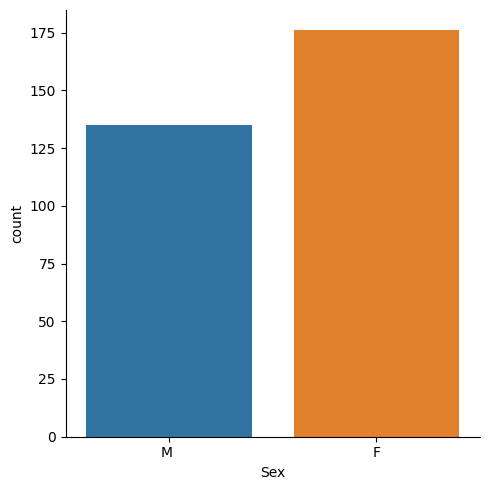

In [ ]:
sns.catplot(x='Sex',kind='count',data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

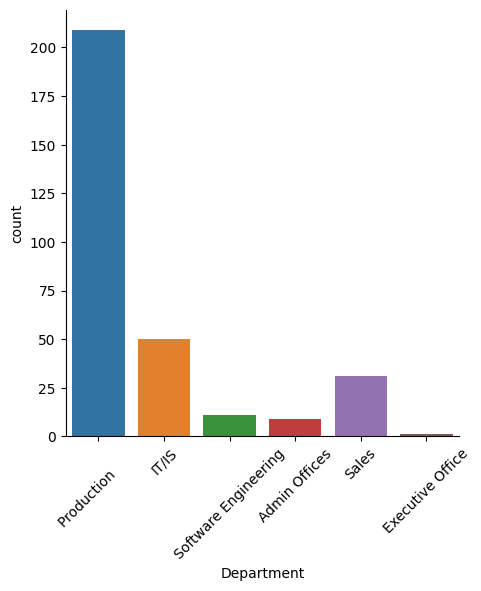

In [ ]:
sns.catplot(x= 'Department',kind='count',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Exceeds'),
  Text(1, 0, 'Fully Meets'),
  Text(2, 0, 'Needs Improvement'),
  Text(3, 0, 'PIP')])

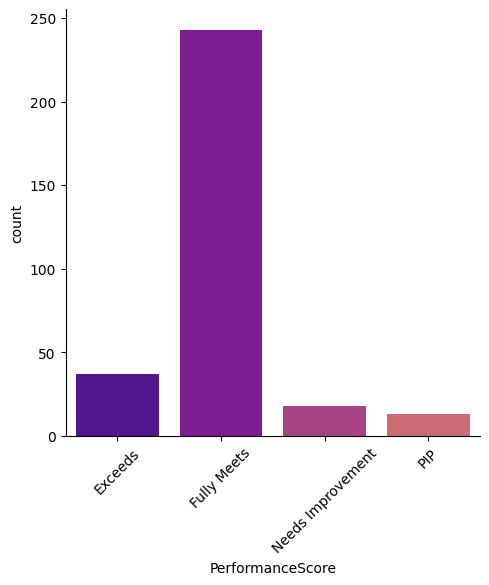

In [ ]:
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)
sns.catplot(x = "PerformanceScore",kind='count', data = df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Two or more races'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'American Indian or Alaska Native'),
  Text(5, 0, 'Hispanic')])

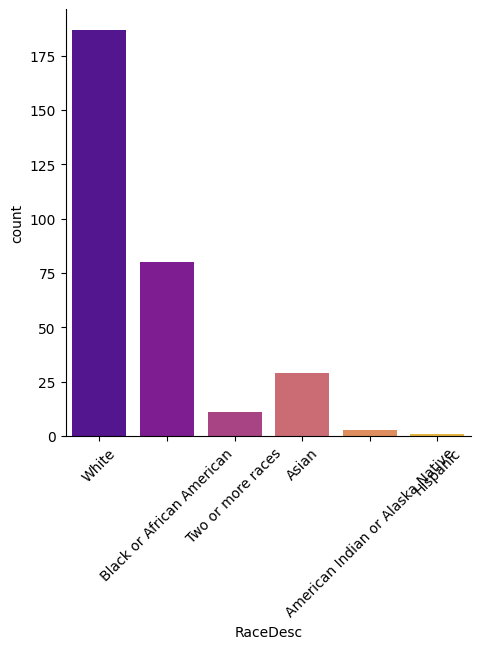

In [ ]:
sns.catplot(x= 'RaceDesc',kind='count',data=df)
plt.xticks(rotation=45)


In [ ]:
fig = px.bar(df, x="Department",  color="PerformanceScore" )
 
fig.show()

In [ ]:
b=df.groupby('PerformanceScore')['EmpSatisfaction'].mean().reset_index()
b

,PerformanceScore,EmpSatisfaction
0,Exceeds,4.108108
1,Fully Meets,3.950617
2,Needs Improvement,3.611111
3,PIP,2.538462


In [ ]:
b=df.groupby('Department')['EmpSatisfaction'].mean().reset_index()
b

,Department,EmpSatisfaction
0,Admin Offices,3.555556
1,Executive Office,3.000000
2,IT/IS,3.960000
3,Production,3.861244
4,Sales,4.032258
5,Software Engineering,4.090909


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Admin Offices'),
  Text(1, 0, 'Executive Office'),
  Text(2, 0, 'IT/IS'),
  Text(3, 0, 'Production       '),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Software Engineering')])

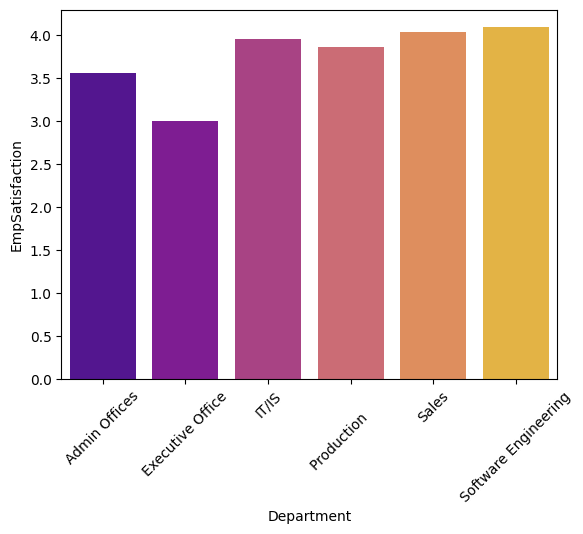

In [ ]:
sns.barplot(x='Department',y='EmpSatisfaction',data=b)
plt.xticks(rotation=45)

<Axes: xlabel='EmpSatisfaction', ylabel='Salary'>

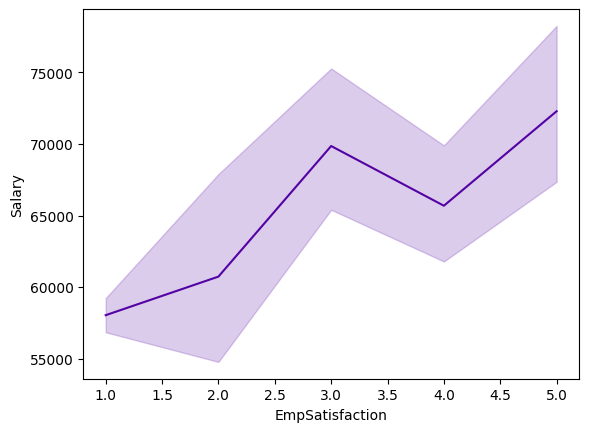

In [ ]:
sns.lineplot(x = "EmpSatisfaction", y = "Salary", data = df)

<Axes: xlabel='EngagementSurvey', ylabel='Salary'>

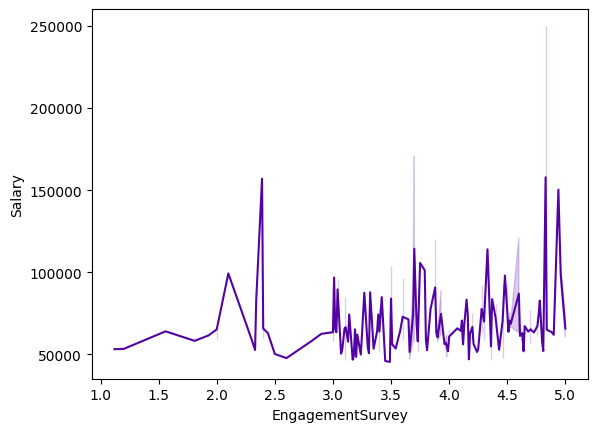

In [ ]:
sns.lineplot(x = "EngagementSurvey", y = "Salary", data = df)

In [ ]:
b=df.groupby('Department')['Salary'].mean().reset_index()
b


,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Admin Offices'),
  Text(1, 0, 'Executive Office'),
  Text(2, 0, 'IT/IS'),
  Text(3, 0, 'Production       '),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Software Engineering')])

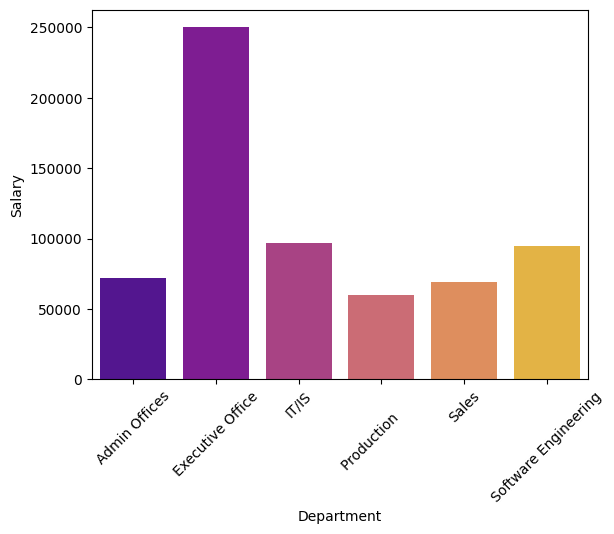

In [ ]:
sns.barplot(x='Department',y='Salary',data=b)
plt.xticks(rotation=45)

In [ ]:
fig = px.bar(df, x="RecruitmentSource",  color="RaceDesc" )
 
fig.show()